In [1]:
from Model.GeoGans import GAN2D_MPS, WGAN2D_MPS, AlphaGAN_MPS, CycleGAN_MPS
from Model.Utils import PlotHistory, Save_Model,PlotDataAE
from Model.Utils import load_numpy, convert_to_tfrecords, MPS_Generator, model_plot
from keras.optimizers import RMSprop,Adam
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
import os
import timeit
%matplotlib notebook

/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

Instructions for updating:
Colocations handled automatically by placer.


# Load DataSet

In [2]:
load_tfrecords = True 
create_tfrecords = False

path_tfr = 'DataSet/MPS60'
path_npy = '/share/GeoFacies/ModelosDeFacies/ModelMPS60/DataSet/DataSet.npy'
batch_size = 32

In [3]:
if load_tfrecords:    
    if create_tfrecords: 
        x_train, x_test = load_numpy(path_npy,random_state=0,split_data=0.30)
        convert_to_tfrecords(path_tfr,x_train,x_test)
        gen_train = MPS_Generator(os.path.join(path_tfr, 'train.tfrecords'), 14000)
        
    else:
        try:
            gen_train = MPS_Generator(os.path.join(path_tfr, 'train.tfrecords'), 14000)
        except:
            print("Data not found. Change 'create_tfrecords' to True")
    x_train = gen_train.get_numpy_batch().astype('float32')
else:
    x_train, _ = load_numpy(path_npy,random_state=0,split_data=0.30)
x_train = x_train*2 -1

# Training GAN models 

In [4]:
_, n_rows, n_cols, n_chns = x_train.shape
path_weights = os.path.join(path_tfr, 'w60_GAN.hdf5')
num_epochs = 25

## 1. GAN2D Network

In [5]:
model = GAN2D_MPS(input_shape = (n_rows, n_cols, n_chns),SpectralNormalization=True) # saving_path = path_tfr + '/', summary = True

start = timeit.default_timer()
#model.train(x_train , epochs=num_epochs, num_plots = 10)
stop = timeit.default_timer()
print('Time: ', stop - start) 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gan_g_input (InputLayer)     (None, 500)               0         
_________________________________________________________________
gan_g_dense (Dense)          (None, 16384)             8208384   
_________________________________________________________________
gan_g_reshape (Reshape)      (None, 8, 8, 256)         0         
_________________________________________________________________
gan_g_bn_dense (BatchNormali (None, 8, 8, 256)         1024      
_________________________________________________________________
gan_g_relu (Activation)      (None, 8, 8, 256)         0         
_________________________________________________________________
gan_g_1_deconv2D (Conv2DTran (None, 16, 16, 128)       524416    
_________________________________________________________________
gan_g_1_bn (BatchNormalizati (None, 16, 16, 128)       512       
__________

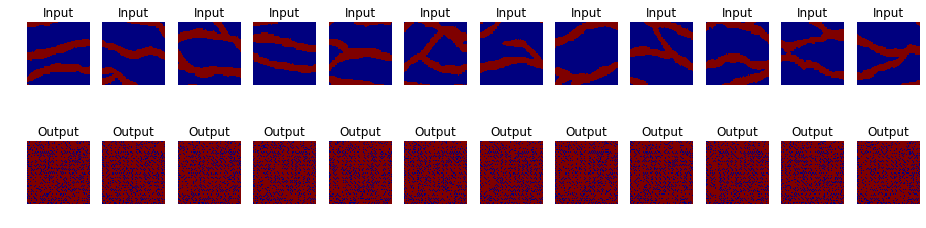

In [6]:
model_plot(x_train[:20], model, num_plots = 12)

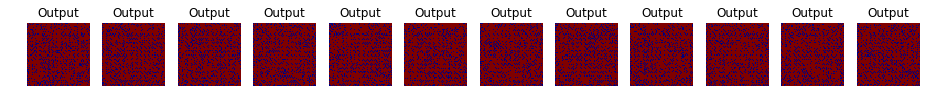

In [7]:
x_random = np.random.normal(0, 1, size=(20, 500))
model_plot(x_random, model, num_plots = 12, mode = "gen", figsize = (60,60), type_model = "CycleGAN" )

## 2. WGAN2D_MPS Network

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gan_g_input (InputLayer)     (None, 500)               0         
_________________________________________________________________
gan_g_dense (Dense)          (None, 16384)             8208384   
_________________________________________________________________
gan_g_reshape (Reshape)      (None, 8, 8, 256)         0         
_________________________________________________________________
gan_g_bn_dense (BatchNormali (None, 8, 8, 256)         1024      
_________________________________________________________________
gan_g_relu (Activation)      (None, 8, 8, 256)         0         
_________________________________________________________________
gan_g_1_deconv2D (Conv2DTran (None, 16, 16, 128)       524416    
_________________________________________________________________
gan_g_1_bn (BatchNormalizati (None, 16, 16, 128)       512       
__________

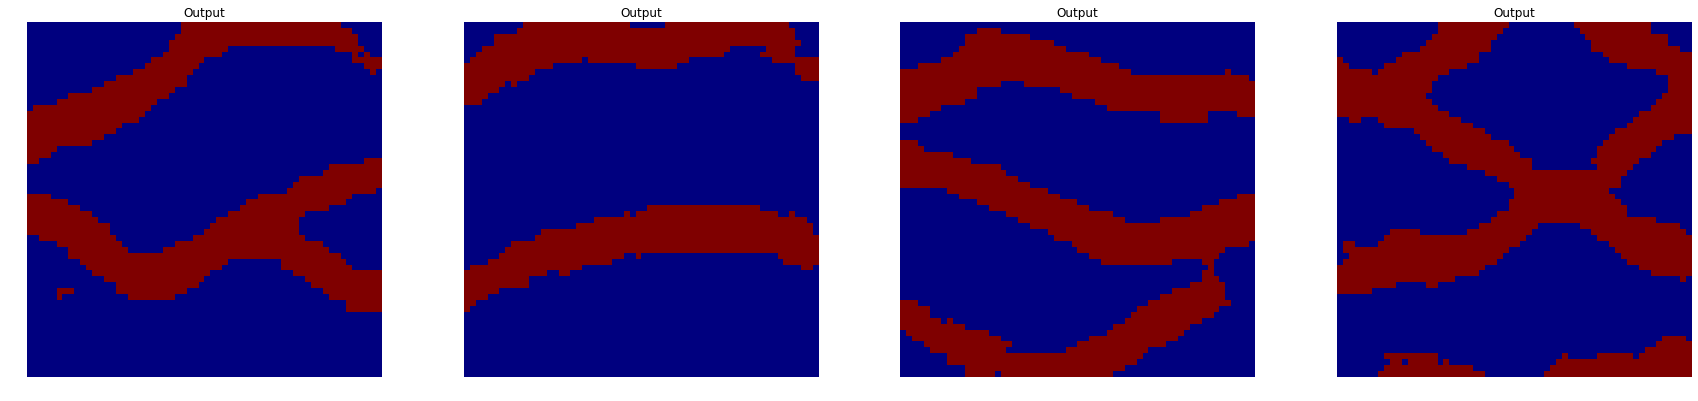

Saving check point ...
Iteration:  10000   D loss:  -35.174614   G loss:  -2246.3396   Accuracy:  0.9653212
Saving check point ...
Iteration:  15000   D loss:  -29.835487   G loss:  -2186.964   Accuracy:  0.9645747
Random realizations ...


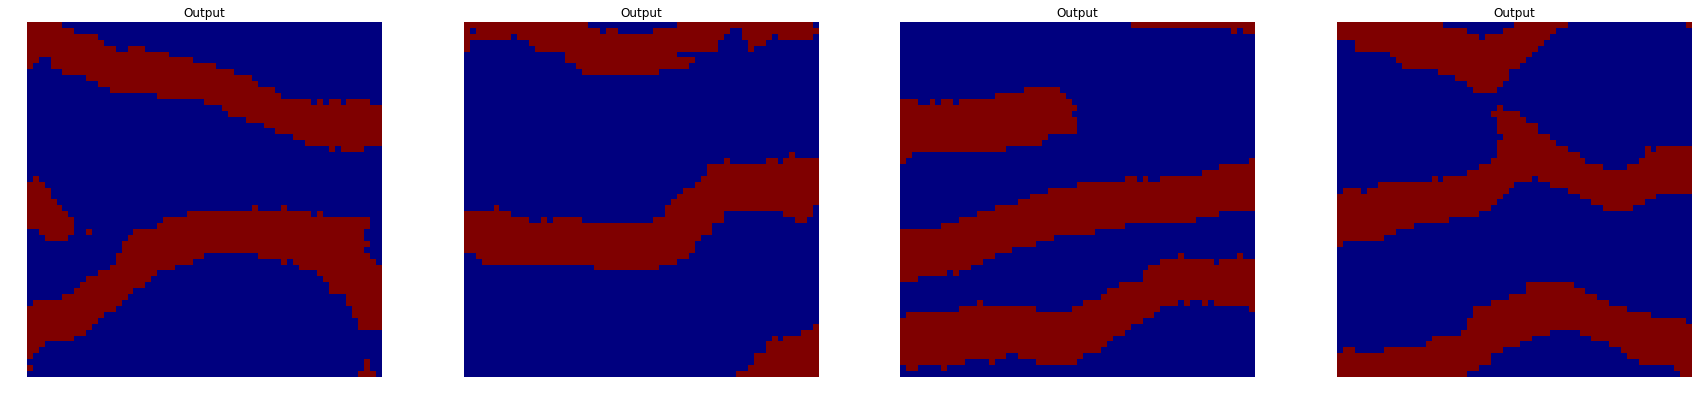

Saving check point ...
Iteration:  20000   D loss:  -29.722128   G loss:  -2178.6475   Accuracy:  0.9678863
Iteration:  25000   D loss:  -30.107435   G loss:  -2078.7712   Accuracy:  0.9588455
Random realizations ...


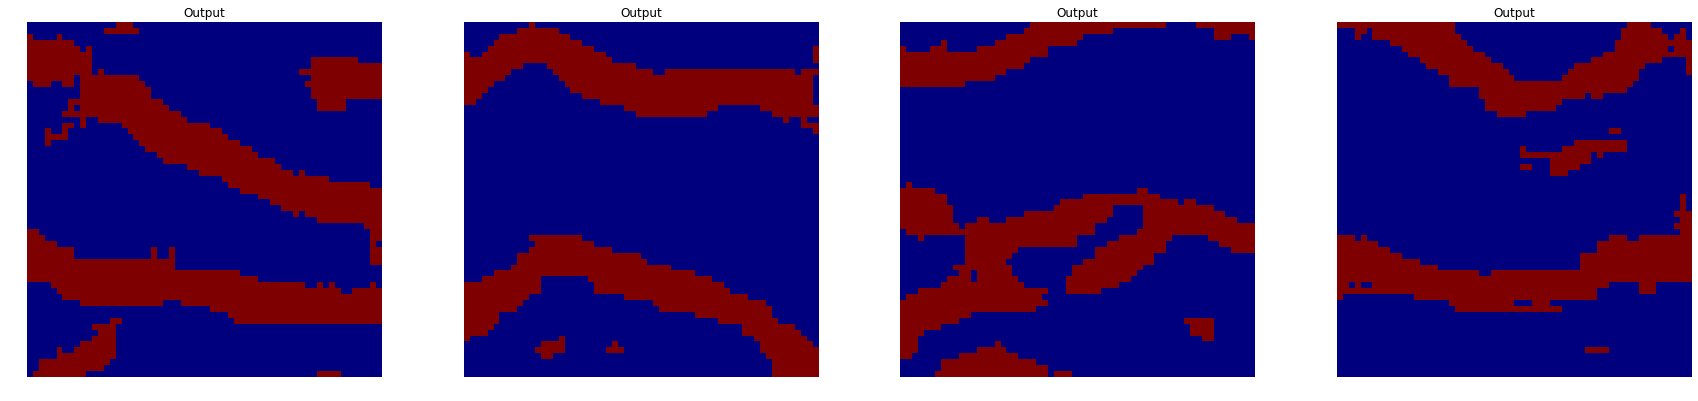

Iteration:  30000   D loss:  -30.329319   G loss:  -2000.7384   Accuracy:  0.95338976
Iteration:  35000   D loss:  -30.406872   G loss:  -1938.1357   Accuracy:  0.9604123
Random realizations ...


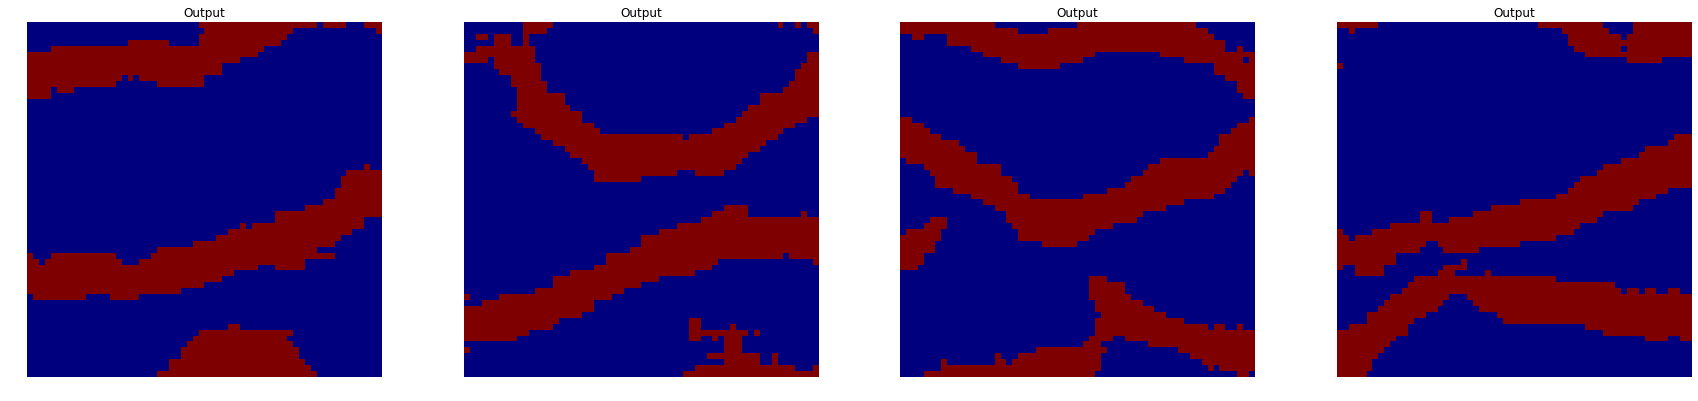

Iteration:  40000   D loss:  -30.407274   G loss:  -1878.5724   Accuracy:  0.9476476
Iteration:  45000   D loss:  -30.358696   G loss:  -1824.0472   Accuracy:  0.9531337
Random realizations ...


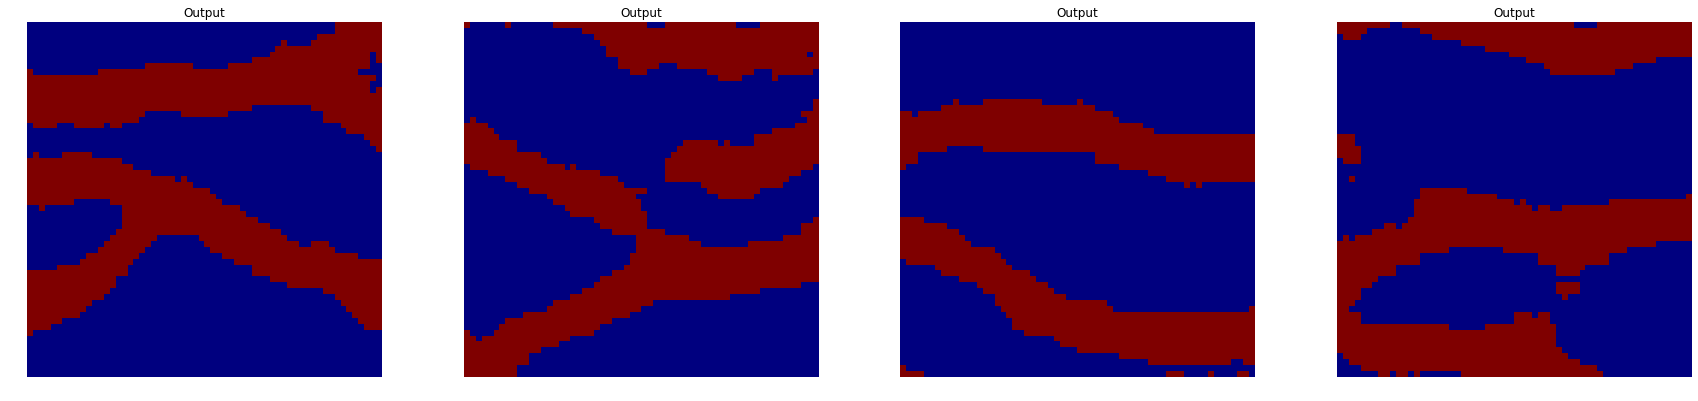

Iteration:  50000   D loss:  -30.067087   G loss:  -1765.1688   Accuracy:  0.9519228
Iteration:  55000   D loss:  -29.886028   G loss:  -1728.6654   Accuracy:  0.9429688
Random realizations ...


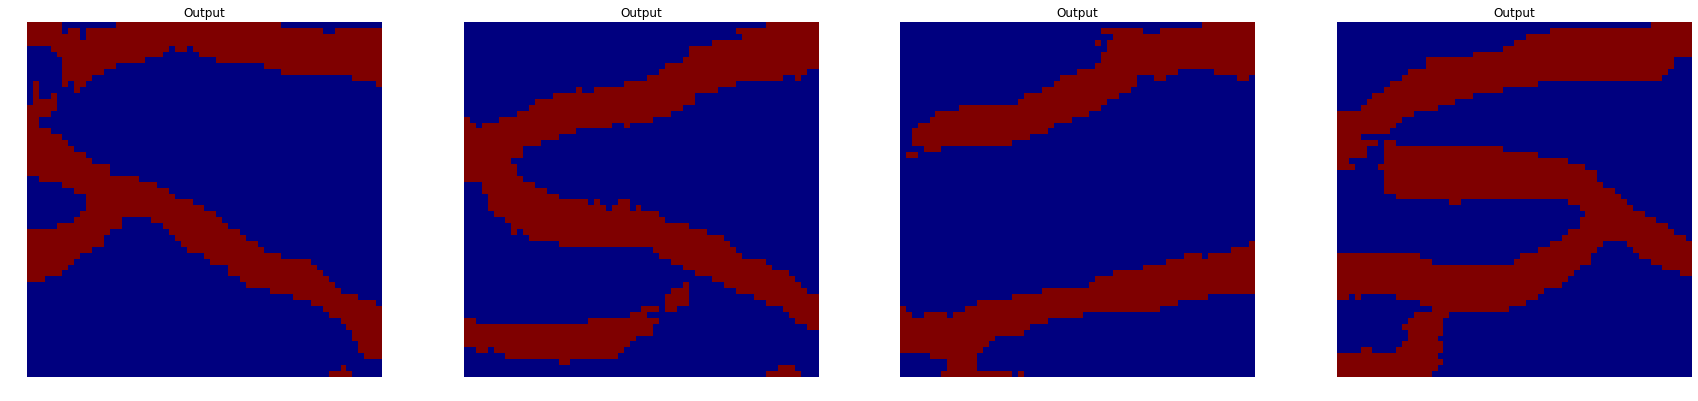

Saving check point ...
Iteration:  60000   D loss:  -29.705212   G loss:  -1689.9552   Accuracy:  0.9458247
Saving check point ...
Iteration:  65000   D loss:  -29.531754   G loss:  -1660.8105   Accuracy:  0.9515886
Random realizations ...


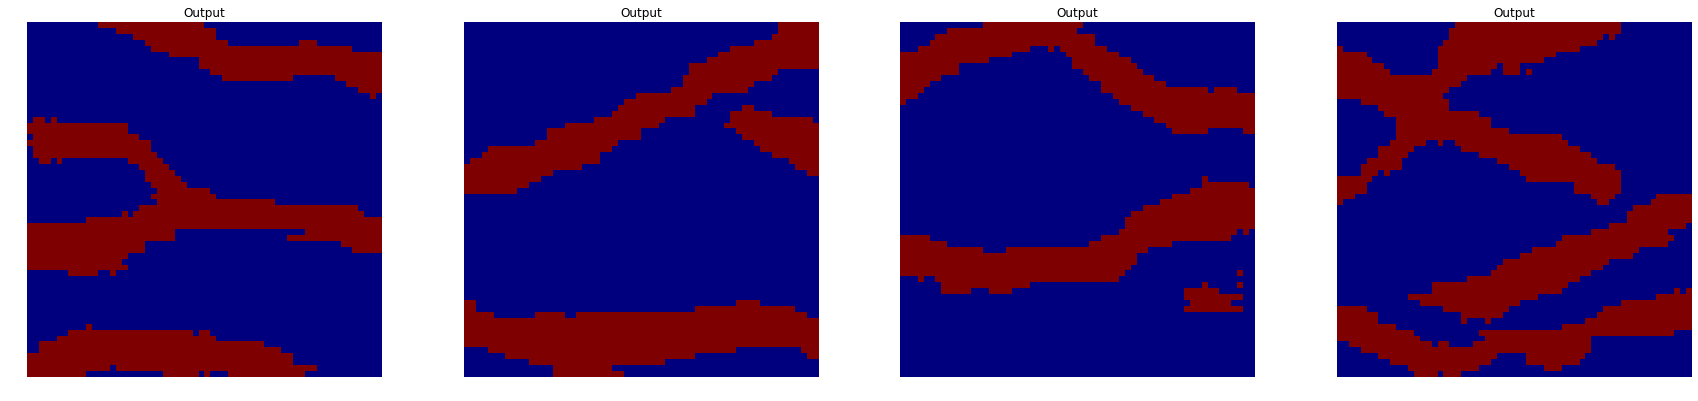

Saving check point ...
Iteration:  70000   D loss:  -29.25532   G loss:  -1626.6918   Accuracy:  0.9310026
Saving check point ...
Iteration:  75000   D loss:  -28.943693   G loss:  -1612.4482   Accuracy:  0.9506033
Random realizations ...


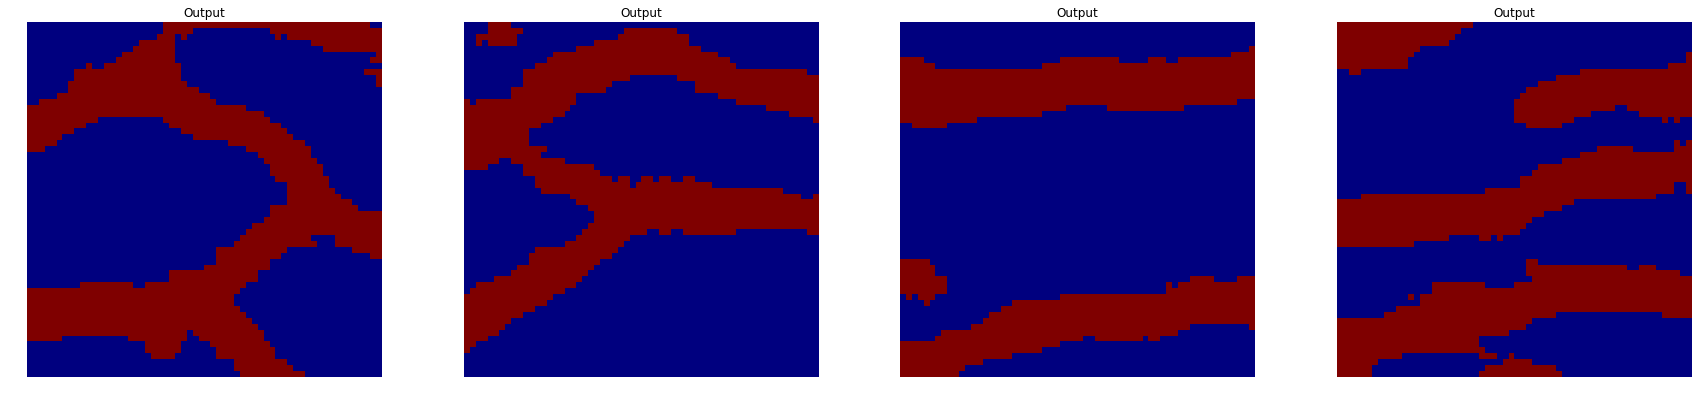

Saving check point ...
Iteration:  80000   D loss:  -28.617422   G loss:  -1584.2146   Accuracy:  0.94614583
Saving check point ...
Iteration:  85000   D loss:  -28.40155   G loss:  -1559.046   Accuracy:  0.95110244
Random realizations ...


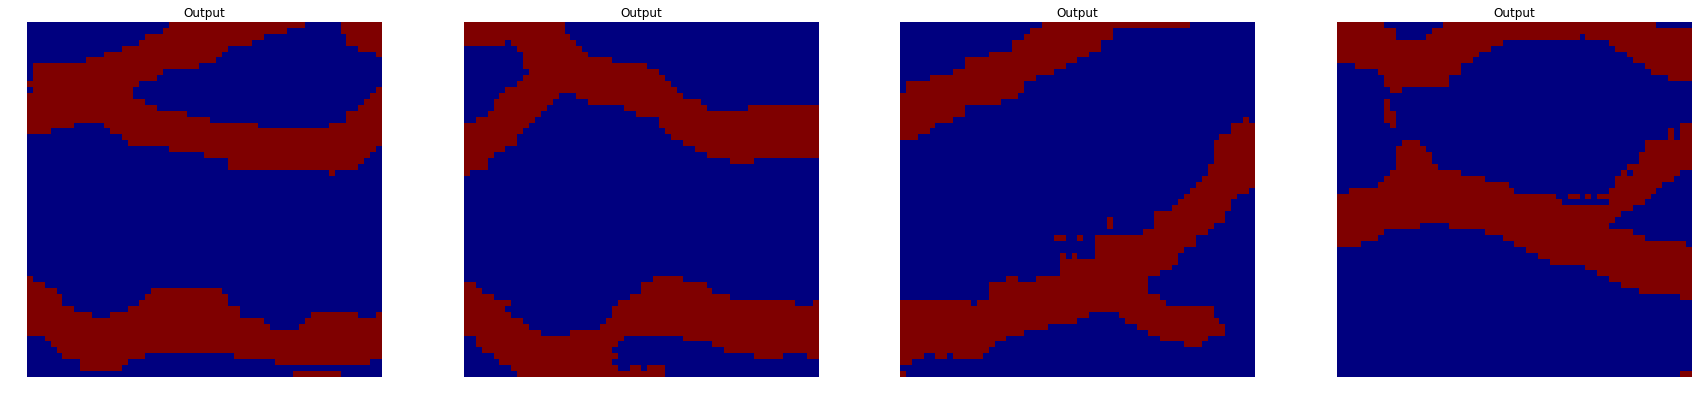

Saving check point ...
Iteration:  90000   D loss:  -27.967375   G loss:  -1535.5844   Accuracy:  0.9492665
Saving check point ...
Iteration:  95000   D loss:  -27.80508   G loss:  -1508.4633   Accuracy:  0.95006514
Random realizations ...


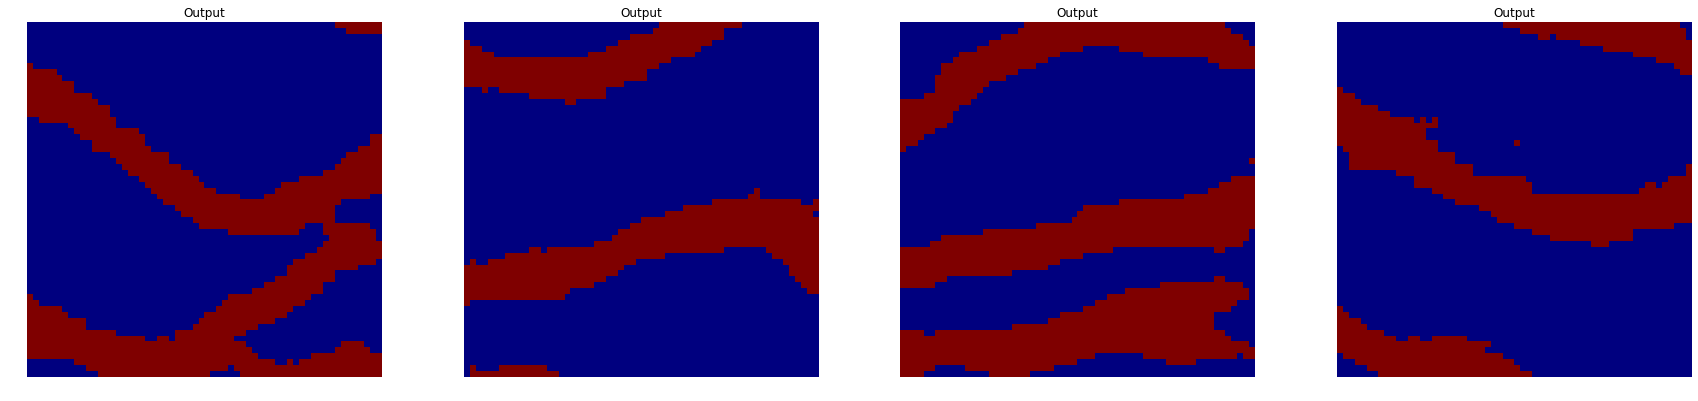

Saving check point ...
Iteration:  100000   D loss:  -27.524132   G loss:  -1496.3041   Accuracy:  0.9446962
Saving check point ...
Iteration:  105000   D loss:  -27.181725   G loss:  -1484.9047   Accuracy:  0.9465625
Random realizations ...


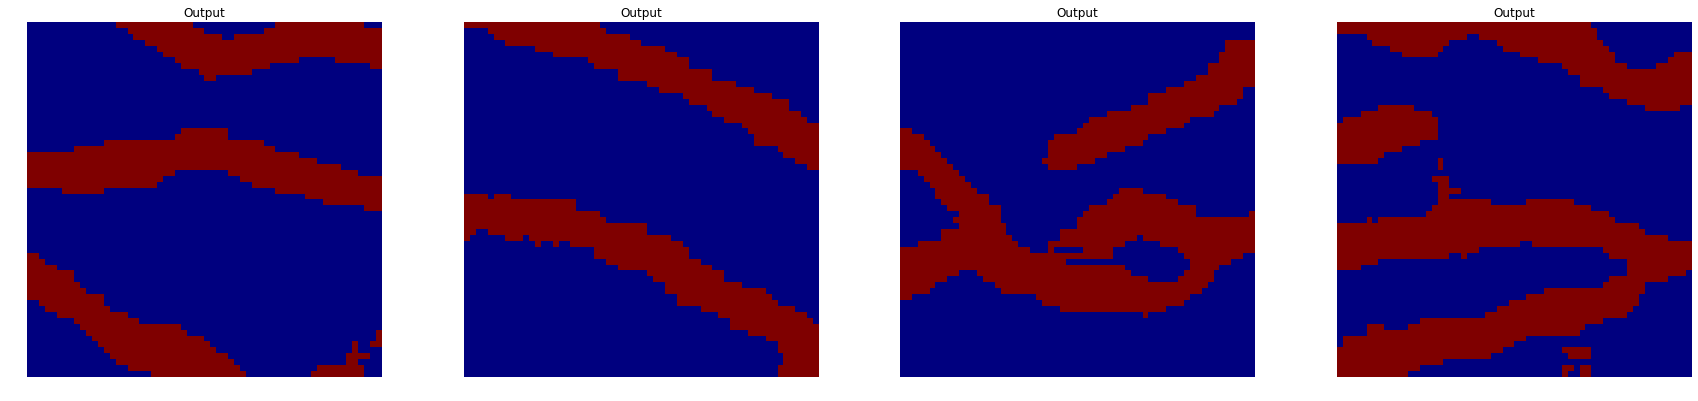

Saving check point ...
Iteration:  110000   D loss:  -26.920465   G loss:  -1464.3077   Accuracy:  0.9407205
Saving check point ...
Iteration:  115000   D loss:  -26.686037   G loss:  -1465.0731   Accuracy:  0.95737416
Random realizations ...


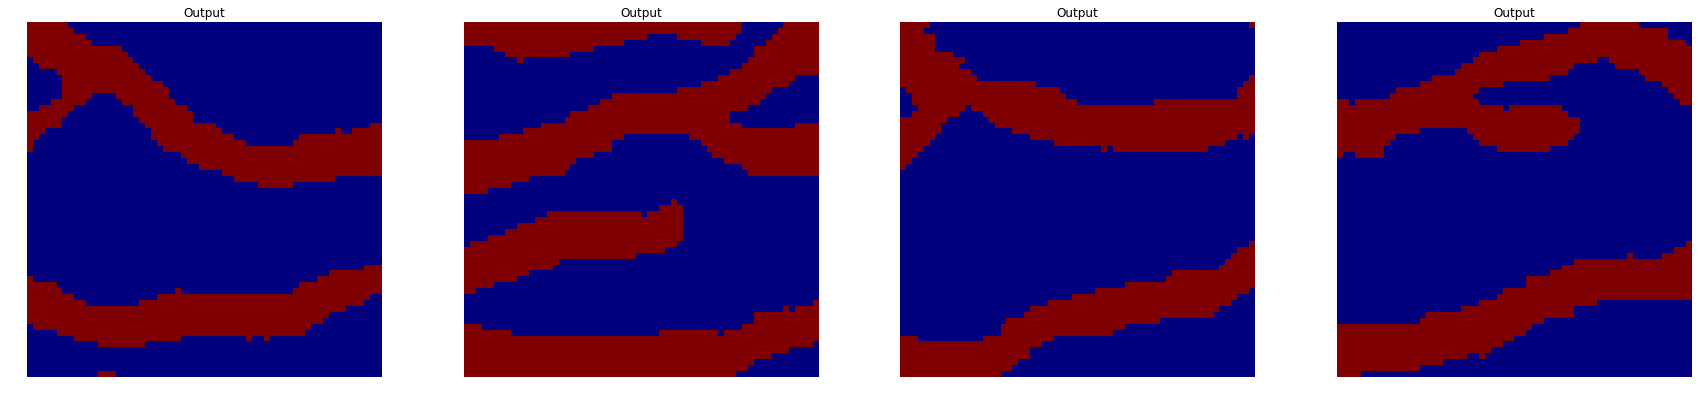

Saving check point ...
Iteration:  120000   D loss:  -26.399324   G loss:  -1449.6901   Accuracy:  0.9431771
Saving check point ...
Iteration:  125000   D loss:  -26.12427   G loss:  -1446.5878   Accuracy:  0.9491493
Restauring best Discriminator and Generator Models ...
Initializing encoder variables ...
Starting Encoder training ...
epoch 1 E loss -> 155.71257 Acc -> 0.8971148
epoch 2 E loss -> 136.35083 Acc -> 0.9093854
epoch 3 E loss -> 122.660416 Acc -> 0.9180175
epoch 4 E loss -> 117.24936 Acc -> 0.9215322
epoch 5 E loss -> 111.97266 Acc -> 0.9248681
epoch 6 E loss -> 107.621 Acc -> 0.92764026
epoch 7 E loss -> 106.204704 Acc -> 0.92850673
epoch 8 E loss -> 103.491325 Acc -> 0.9302766
epoch 9 E loss -> 102.218445 Acc -> 0.93108594
epoch 10 E loss -> 100.30829 Acc -> 0.93235797
epoch 11 E loss -> 98.78247 Acc -> 0.9333366
epoch 12 E loss -> 99.49835 Acc -> 0.93286717
epoch 13 E loss -> 96.33783 Acc -> 0.93482864
epoch 14 E loss -> 93.20775 Acc -> 0.93686014
epoch 15 E loss -> 94.0

epoch 173 E loss -> 69.52475 Acc -> 0.95186454
epoch 174 E loss -> 69.23489 Acc -> 0.9520267
epoch 175 E loss -> 69.364845 Acc -> 0.952027
epoch 176 E loss -> 69.22577 Acc -> 0.95206624
epoch 177 E loss -> 69.44859 Acc -> 0.95191854
epoch 178 E loss -> 69.58396 Acc -> 0.9518734
epoch 179 E loss -> 69.56943 Acc -> 0.9518701
epoch 180 E loss -> 69.51563 Acc -> 0.9519057
epoch 181 E loss -> 69.7011 Acc -> 0.95176667
epoch 182 E loss -> 69.57831 Acc -> 0.95191574
epoch 183 E loss -> 69.18797 Acc -> 0.9520786
epoch 184 E loss -> 68.88336 Acc -> 0.95228595
epoch 185 E loss -> 69.22283 Acc -> 0.95206594
epoch 186 E loss -> 69.03972 Acc -> 0.95220673
epoch 187 E loss -> 69.29314 Acc -> 0.95202
epoch 188 E loss -> 69.0499 Acc -> 0.952196
epoch 189 E loss -> 69.488976 Acc -> 0.9519211
epoch 190 E loss -> 69.173134 Acc -> 0.95209694
epoch 191 E loss -> 69.37706 Acc -> 0.95196676
epoch 192 E loss -> 69.30583 Acc -> 0.95200276
epoch 193 E loss -> 69.173515 Acc -> 0.95212775
epoch 194 E loss -> 69.1

In [8]:
num_epochs=25
model = WGAN2D_MPS(summary = True, input_shape = (n_rows, n_cols, n_chns),SpectralNormalization=True)
start = timeit.default_timer()
model.train(x_train , epochs=num_epochs)
stop = timeit.default_timer()
print('Time: ', stop - start) 

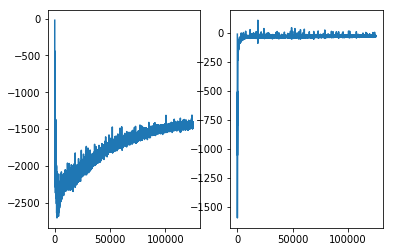

In [9]:
from matplotlib  import pylab as plt
plt.subplot(1,2,1)
plt.plot(model.history['loss_g'])
plt.subplot(1,2,2)
plt.plot(model.history['loss_d'])
plt.show()

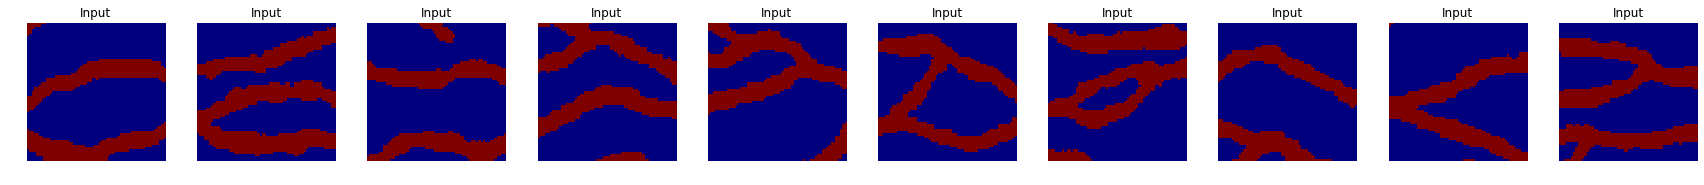

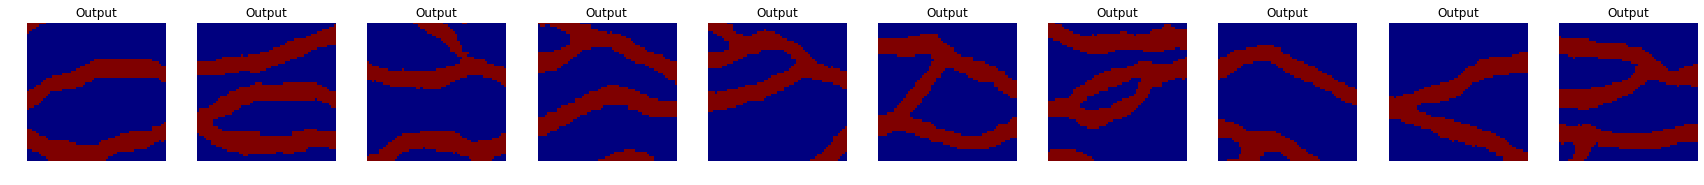

In [10]:
PlotDataAE(np.argmax(x_train[:20], axis=-1), model.Decoder(x_train[:20], True), digit_size=(n_rows, n_cols), Only_Result=True)

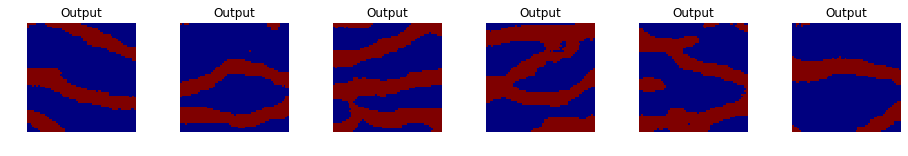

In [11]:
x_random = np.random.normal(0, 1, size=(20, 500))
model_plot(x_random, model, num_plots = 6, mode = "gen", figsize = (60,60), type_model = "CycleGAN" )

In [12]:
return

SyntaxError: 'return' outside function (<ipython-input-12-9b32c1431b19>, line 1)

## 3. AlphaGAN_MPS Network

In [ ]:
num_epochs = 100

In [ ]:
start = timeit.default_timer()
model = AlphaGAN_MPS(summary = True, input_shape = (n_rows, n_cols, n_chns),alpha=100,
                    SpectralNormalization=True,saving_path='/share/GeoFacies/GeoFacies_DL/')
model.train(x_train , epochs=num_epochs, num_plots = 10)
stop = timeit.default_timer()
print('Time: ', stop - start) 

In [ ]:
PlotDataAE(np.argmax(x_train[:20], axis=-1), model.Decoder(x_train[:20], True), digit_size=(n_rows, n_cols), Only_Result=True)

In [ ]:
x_random = np.random.normal(0, 1, size=(20, 500))
model_plot(x_random, model, num_plots = 4, mode = "gen", figsize = (60,60), type_model = "CycleGAN" )

## 4.  CycleGAN Network

In [ ]:
start = timeit.default_timer()
model = CycleGAN_MPS(summary = True, input_shape = (n_rows, n_cols, n_chns),batch_size=2,
                     epsilon=0.5,SpectralNormalization=True,saving_path='/share/GeoFacies/GeoFacies_DL/')
model.train(x_train , epochs=num_epochs)
stop = timeit.default_timer()
print('Time: ', stop - start) 